### This is a project to calculate the Surface Land Temperature (LST) for a city in Python and then export to QGIS for mapping. The following are the steps involved in the process:
- Create a function to calculate the LST in Python for a region where the city (Birmingham, UK in this case) is located and save the result as a Geotiff file
- Import the file to QGIS to be reprojected to EPSG:27700 (British National Grid) and then clip it by Birmingham boundary

### Data sources and Python and QGIS versions:

- USGS's Landsat-8 data LC09_L1TP_203023_20220716_20230407_02_T1 (Band 4, 5 and 10) data: available at https://earthexplorer.usgs.gov/)
- Birmingham boundary data: available at https://borders.ukdataservice.ac.uk/
- Python version: 3.11.6
- QGIS version: 3.32.1

In [2]:
# Import the libraries
import rasterio
import numpy as np
import math

In [3]:
# Create the function to calculate Land Surface Temperature (LST)
def calculate_lst(band4, band5, band10):
    # Convert DN values to TOA radiance
    toa = 0.0003342 * band10 + 0.1
    
    # Calculate brightness temperature (TB)
    tb = (1329.2405 / np.log(799.0284 / toa + 1)) - 273.15
    
    # Calculate NDVI with handling zero division
    ndvi = np.where((band5 + band4) == 0, 0, (band5 - band4) / (band5 + band4))
    
    # Define NDVI min and max
    ndvi_min = np.min(ndvi)
    ndvi_max = np.max(ndvi)
    
    # Calculate PV (Vegetation Fraction)
    pv = ((ndvi - ndvi_min) / (ndvi_max - ndvi_min)) ** 2
    
    # Calculate Land Surface Emissivity (LSE)
    lse = 0.004 * pv + 0.986
    
    # Calculate Land Surface Temperature (LST)
    lst = tb / (1 + (10.8 * tb / 14388) * np.log(lse))
    
    return lst

# Paths to the Landsat-8 TIFF files (replace with your file paths)
band4_path = r'dataset\LC09_L1TP_203023_20220716_20230407_02_T1_B4.tif'
band5_path = r'dataset\LC09_L1TP_203023_20220716_20230407_02_T1_B5.tif'
band10_path = r'dataset\LC09_L1TP_203023_20220716_20230407_02_T1_B10.tif'

# Open the raster files using rasterio
with rasterio.open(band4_path) as src4, rasterio.open(band5_path) as src5, rasterio.open(band10_path) as src10:
    # Read the raster bands as numpy arrays
    band4 = src4.read(1)
    band5 = src5.read(1)
    band10 = src10.read(1)


# Call the function to calculate LST
result_lst = calculate_lst(band4, band5, band10)

# Print the result_lst variable
print(result_lst)

# Path to save the LST result (replace with your file path)
output_path = r'LST_Result\LST_Result.tif'

# Create a new GeoTIFF file for writing
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=result_lst.shape[0],
    width=result_lst.shape[1],
    count=1,  # Number of bands
    dtype=result_lst.dtype,
    crs=src4.crs,
    transform=src4.transform,
) as dst:
    # Write the LST data to the GeoTIFF
    dst.write(result_lst, 1)

print(f"Land Surface Temperature (LST) result saved at: {output_path}")

C:\Users\User\AppData\Local\Temp\ipykernel_19944\3347920720.py:10: RuntimeWarning: divide by zero encountered in divide
  ndvi = np.where((band5 + band4) == 0, 0, (band5 - band4) / (band5 + band4))
C:\Users\User\AppData\Local\Temp\ipykernel_19944\3347920720.py:10: RuntimeWarning: invalid value encountered in divide
  ndvi = np.where((band5 + band4) == 0, 0, (band5 - band4) / (band5 + band4))


[[-125.06252037 -125.06252037 -125.06252037 ... -125.06252037
  -125.06252037 -125.06252037]
 [-125.06252037 -125.06252037 -125.06252037 ... -125.06252037
  -125.06252037 -125.06252037]
 [-125.06252037 -125.06252037 -125.06252037 ... -125.06252037
  -125.06252037 -125.06252037]
 ...
 [-125.06252037 -125.06252037 -125.06252037 ... -125.06252037
  -125.06252037 -125.06252037]
 [-125.06252037 -125.06252037 -125.06252037 ... -125.06252037
  -125.06252037 -125.06252037]
 [-125.06252037 -125.06252037 -125.06252037 ... -125.06252037
  -125.06252037 -125.06252037]]
Land Surface Temperature (LST) result saved at: LST_Result\LST_Result.tif


### The following is the map showing LST in Birmingham exported from QGIS
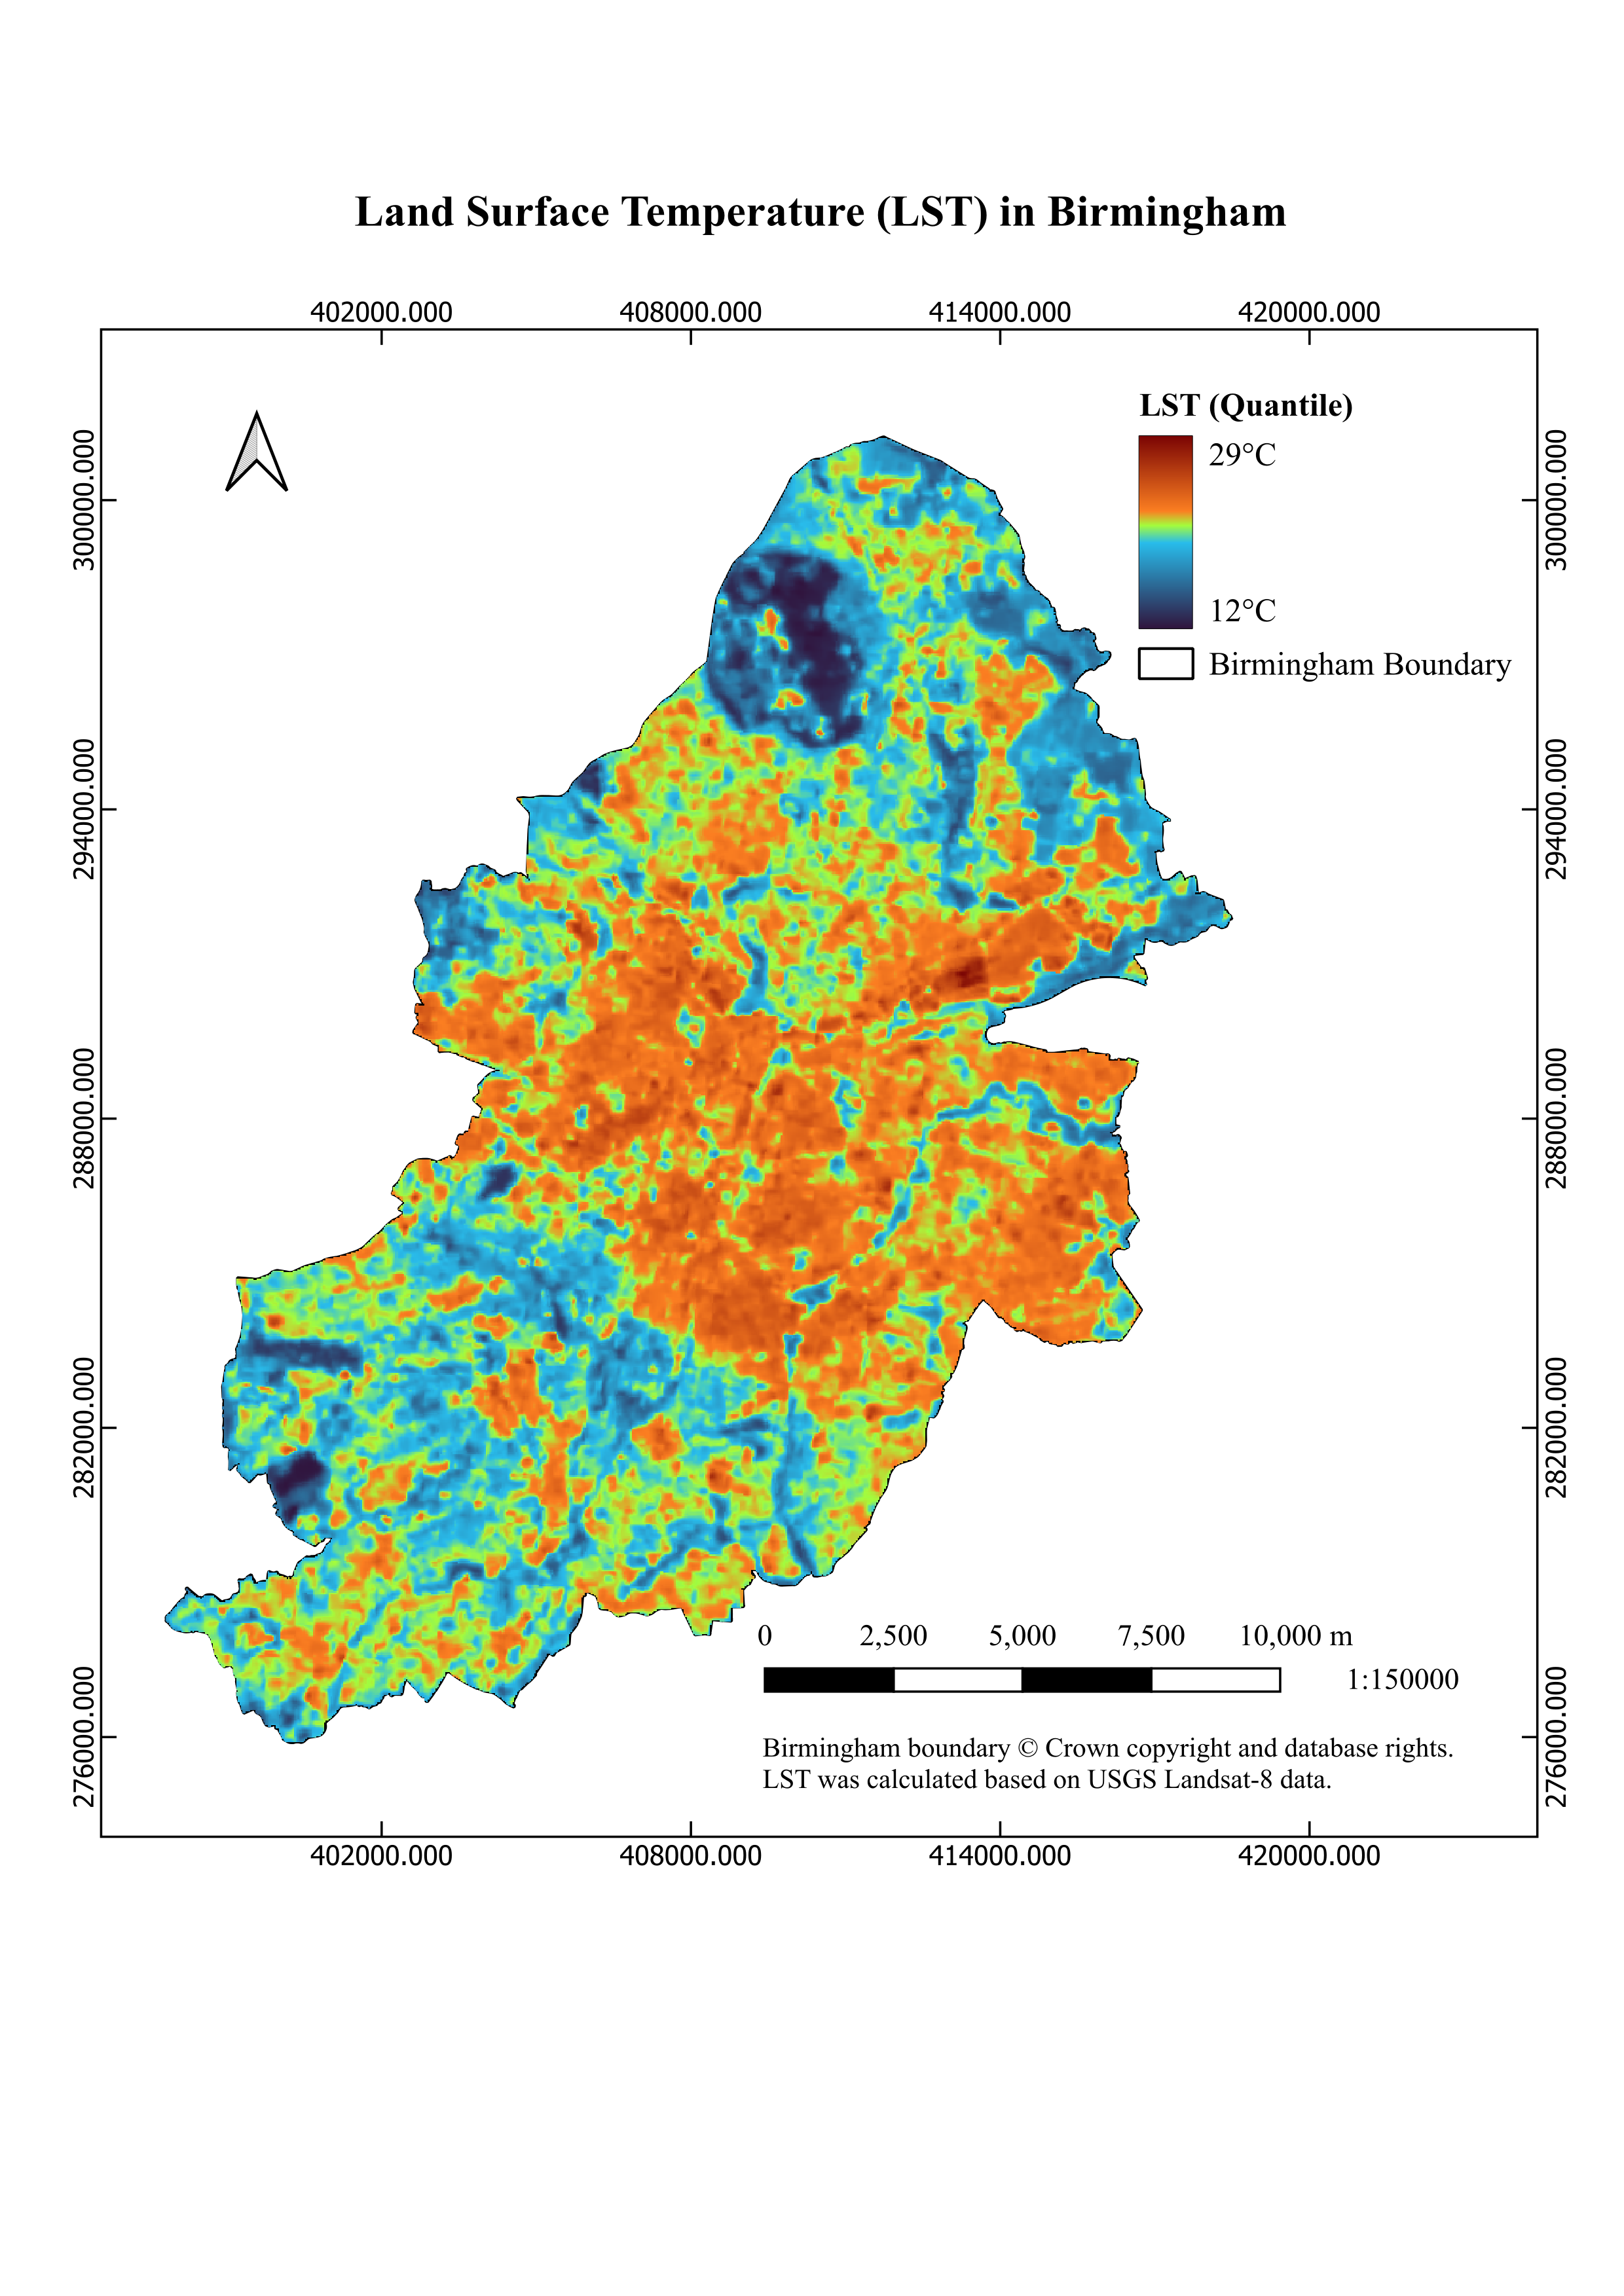